In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customers = pd.read_csv("drive/MyDrive/Projects/Churn_Project/churn_customers.csv")
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Turning churn into a numerical feature
customers["Churn"] = customers["Churn"].map({"Yes": 1, "No": 0})

# Turning SeniorCitizen into categorical
customers["SeniorCitizen"] = customers["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [ ]:
# Convert TotalCharges to numeric
customers["TotalCharges"] = pd.to_numeric(customers["TotalCharges"], errors="coerce")

In [ ]:
customers["TotalCharges"].isnull().sum()

np.int64(11)

In [ ]:
# Drop rows with missing TotalCharges
customers = customers.dropna(subset=['TotalCharges'])

# Dropping "customerID" feature
customers = customers.drop("customerID", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(customers, test_size=0.15, random_state=42)

In [ ]:
print(f"Train size (80%): {train.shape[0]}")
print(f"Test size (20%): {test.shape[0]}")

Train size (80%): 5977
Test size (20%): 1055


## EDA

In [ ]:
train.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,5977.000000,5977.000000,5977.000000,5977.000000
mean,32.342647,64.731354,2278.652409,0.265183
std,24.582546,30.167802,2271.576545,0.441468
min,1.000000,18.250000,18.850000,0.000000
25%,9.000000,35.250000,394.850000,0.000000
50%,29.000000,70.350000,1387.450000,0.000000
75%,55.000000,89.900000,3772.500000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


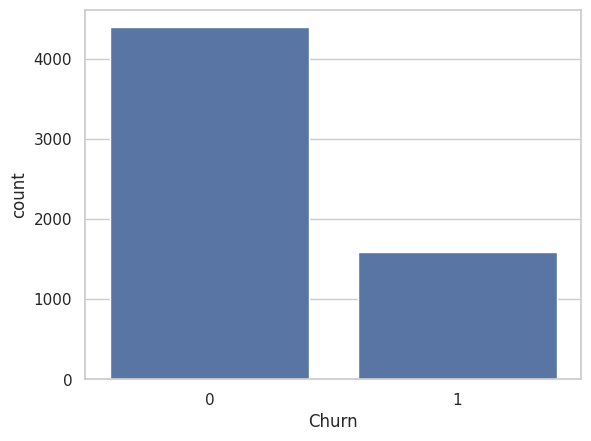

In [ ]:
sns.countplot(x="Churn", data=train)
plt.show()

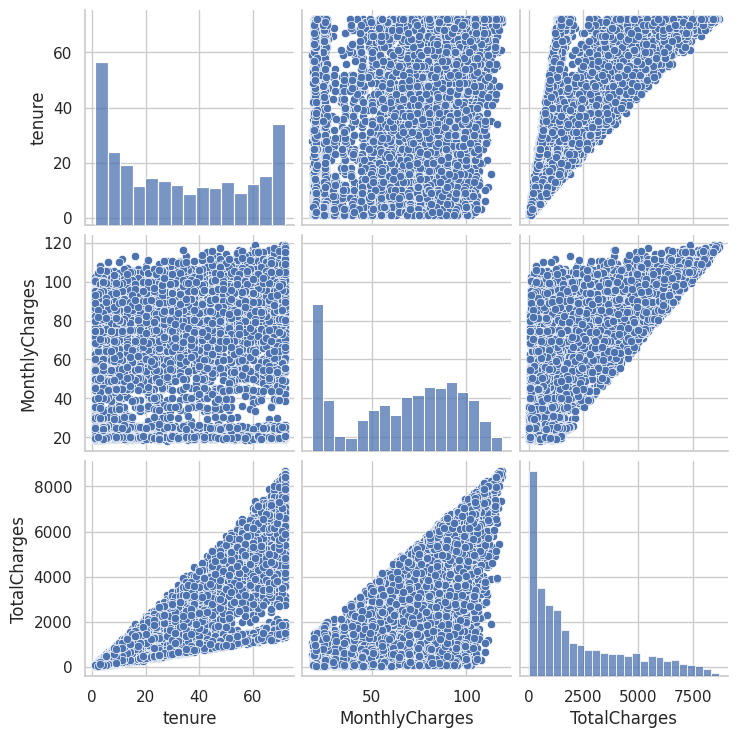

In [ ]:
# Ploting Numerical features
sns.pairplot(train[["tenure", "MonthlyCharges", "TotalCharges"]])
plt.show()

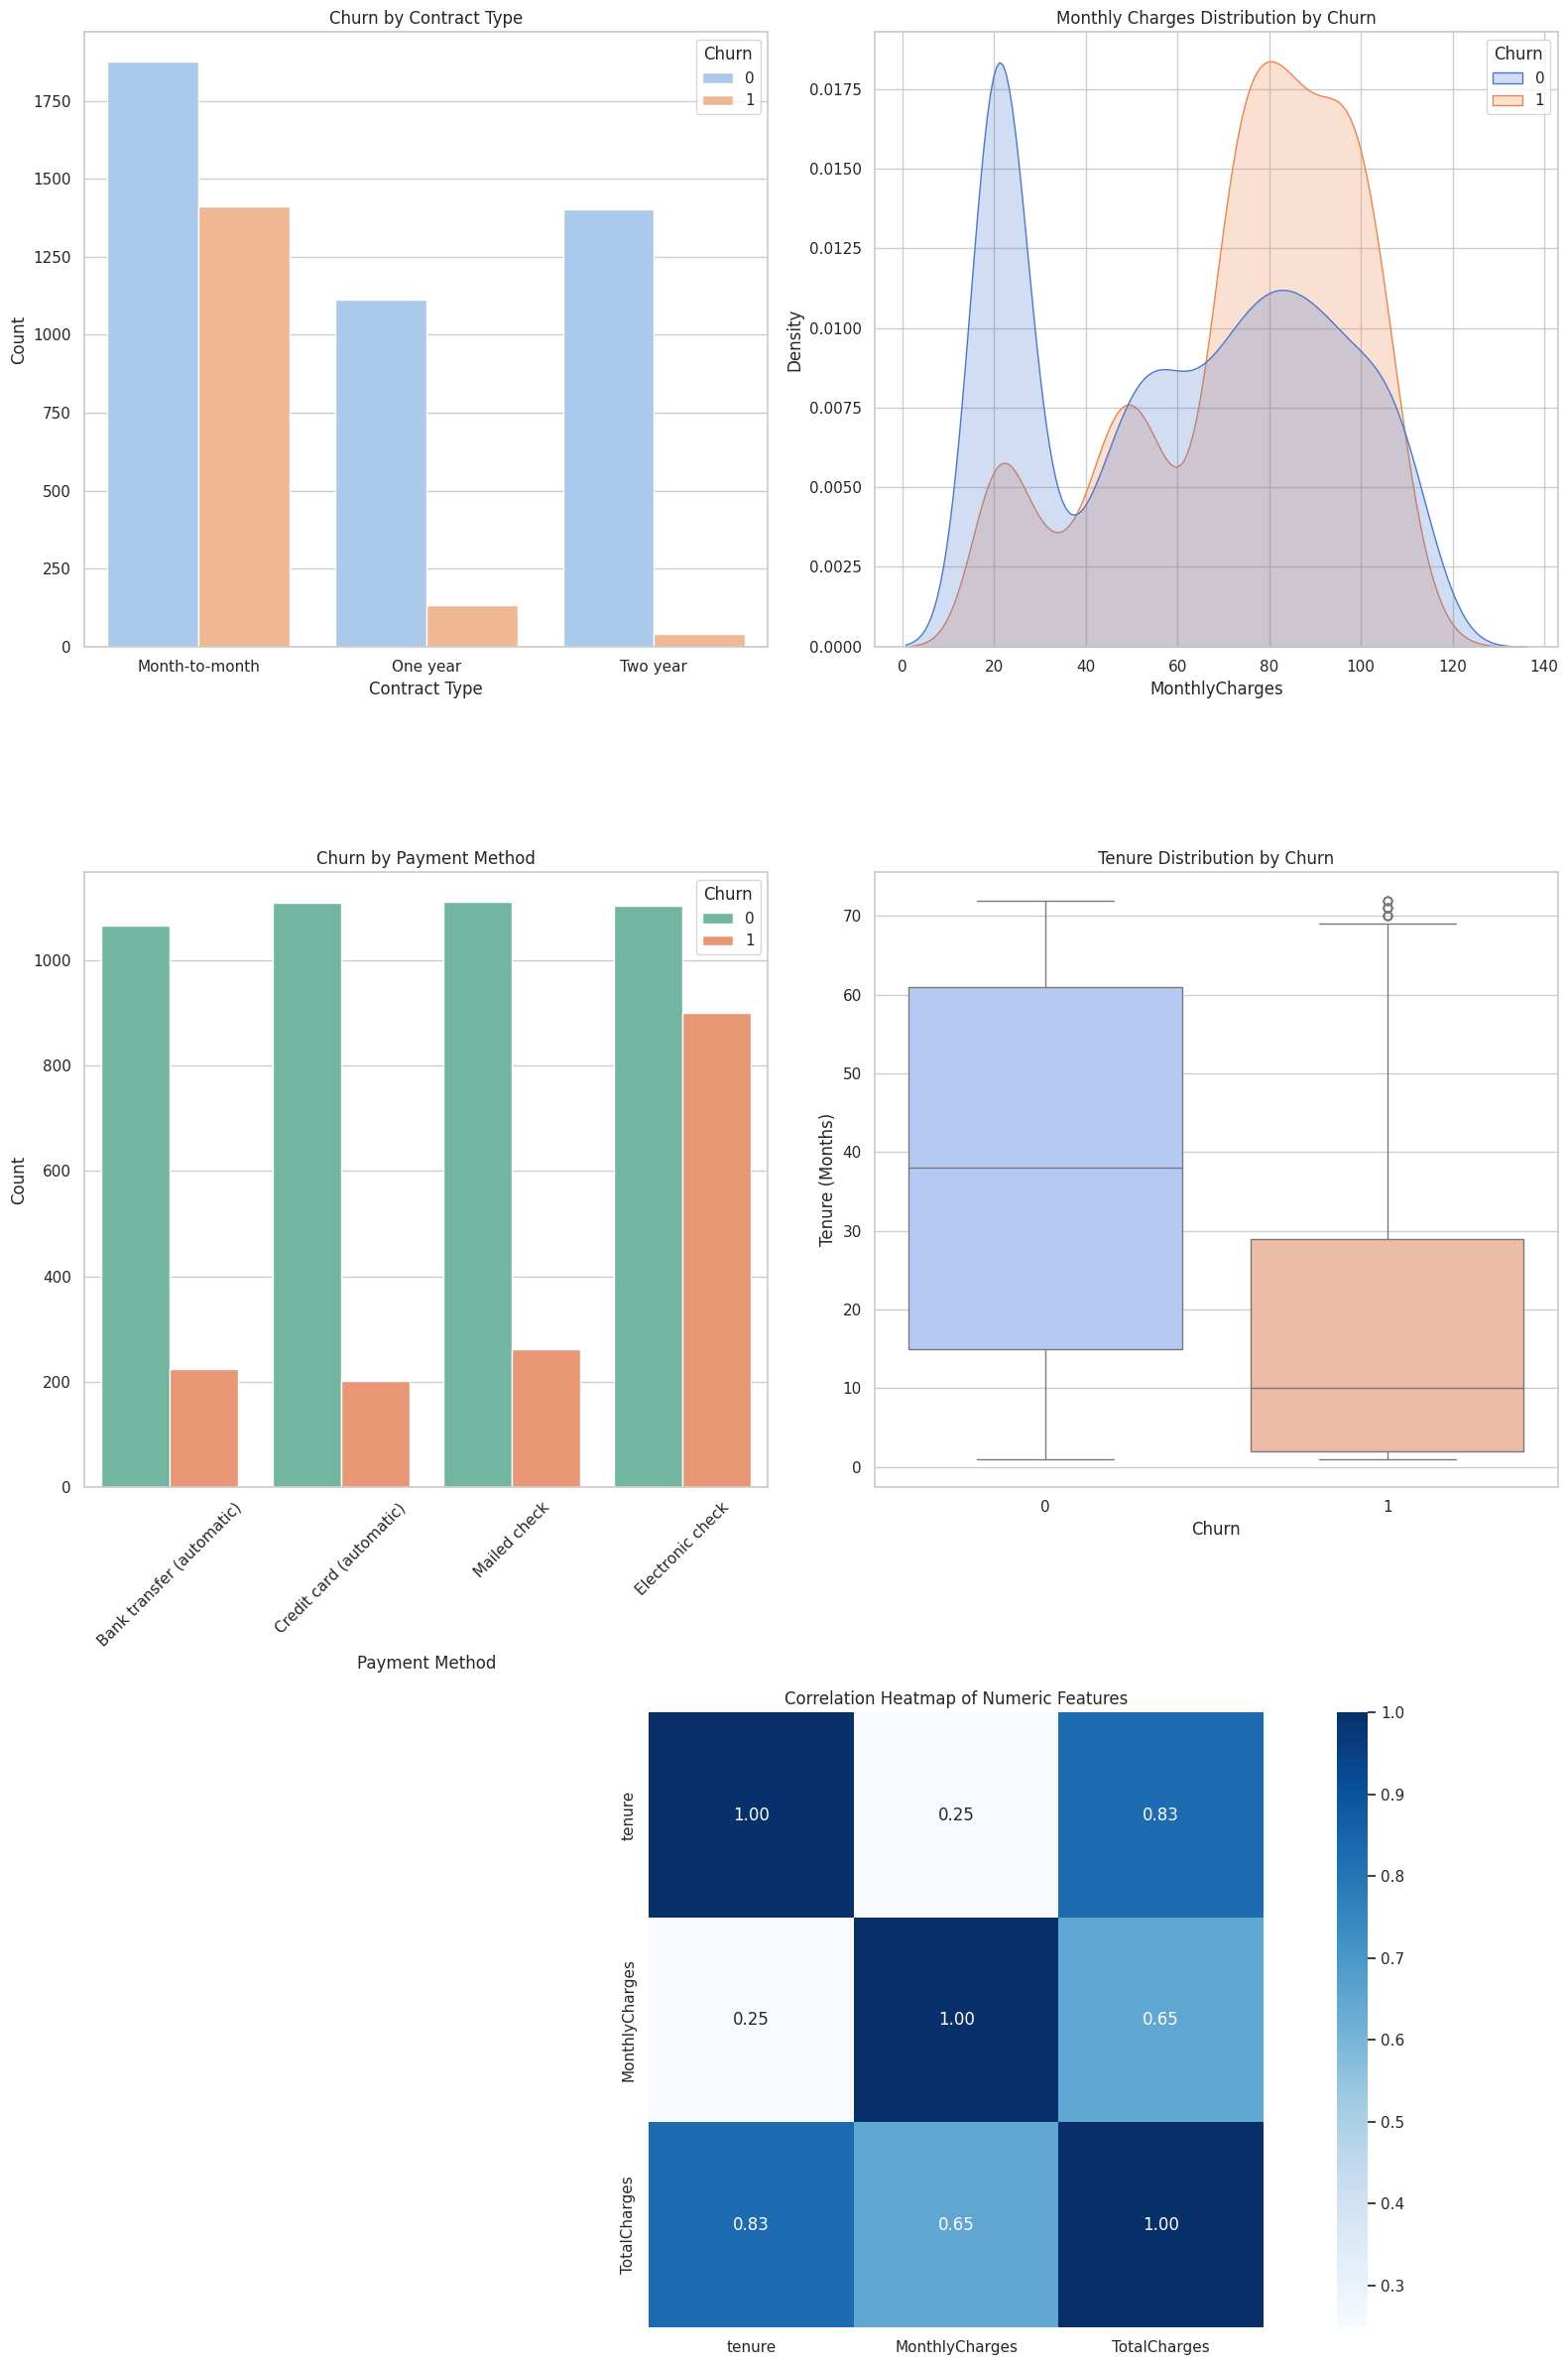

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 24))

# 1. Churn Rate by Contract Type
plt.subplot(3, 2, 1)
sns.countplot(data=train, x="Contract", hue="Churn", palette="pastel")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")

# 2. Monthly Charges Distribution by Churn
plt.subplot(3, 2, 2)
sns.kdeplot(data=train, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False, palette="muted")
plt.title("Monthly Charges Distribution by Churn")

# 3. Churn Rate by Payment Method
plt.subplot(3, 2, 3)
sns.countplot(data=train, x="PaymentMethod", hue="Churn", palette="Set2")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")

# 4. Tenure Distribution by Churn
plt.subplot(3, 2, 4)
sns.boxplot(data=train, x="Churn", y="tenure", palette="coolwarm")
plt.title("Tenure Distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")

# 5. Correlation Heatmap
plt.subplot(3, 2, (5, 6))  # Wider heatmap
numerical_features = train[['tenure', 'MonthlyCharges', 'TotalCharges']]
corr = numerical_features.corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numeric Features")

# Final layout
plt.tight_layout()
plt.show()

In [ ]:
# Correlation of Categorical features
!pip install dython
from dython.nominal import associations

In [ ]:
correlation_matrix = associations(train, compute_only=True)["corr"]

In [ ]:
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.000000,0.000000,0.004215,0.011474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014963,0.000000,0.016470,0.003475,0.014787
SeniorCitizen,0.000000,1.000000,0.014296,0.209847,0.012609,0.000000,0.141751,0.262174,0.204436,0.176234,0.176587,0.218054,0.178668,0.181026,0.146296,0.156029,0.190301,0.215227,0.097853,0.153870
Partner,0.000000,0.014296,1.000000,0.452562,0.389250,0.016070,0.140584,0.000000,0.157690,0.153913,0.160322,0.124504,0.136268,0.133373,0.300600,0.009782,0.158731,0.093538,0.319651,0.149307
Dependents,0.004215,0.209847,0.452562,1.000000,0.166531,0.000000,0.016461,0.175675,0.193285,0.159489,0.153133,0.179585,0.143592,0.137039,0.243225,0.105953,0.144823,0.110848,0.064368,0.165921
tenure,0.011474,0.012609,0.389250,0.166531,1.000000,0.007363,0.344188,0.041815,0.343931,0.371941,0.371443,0.336585,0.298801,0.299343,0.684379,0.006085,0.394017,0.249220,0.826139,-0.357266
PhoneService,0.000000,0.000000,0.016070,0.000000,0.007363,1.000000,0.999916,0.456745,0.176016,0.173669,0.173158,0.176384,0.181813,0.178653,0.000000,0.012307,0.000000,0.248593,0.113302,0.011648
MultipleLines,0.000000,0.141751,0.140584,0.016461,0.344188,0.999916,1.000000,0.398206,0.226434,0.240149,0.245314,0.225875,0.258556,0.262112,0.080438,0.165128,0.165549,0.501863,0.467487,0.039635
InternetService,0.000000,0.262174,0.000000,0.175675,0.041815,0.456745,0.398206,1.000000,0.724208,0.707043,0.706990,0.722918,0.717315,0.716056,0.200966,0.374928,0.309532,0.906697,0.431234,0.324115
OnlineSecurity,0.000000,0.204436,0.157690,0.193285,0.343931,0.176016,0.226434,0.724208,1.000000,0.718287,0.716560,0.732442,0.707808,0.708317,0.299610,0.337888,0.303218,0.765292,0.486415,0.353687
OnlineBackup,0.000000,0.176234,0.153913,0.159489,0.371941,0.173669,0.240149,0.707043,0.718287,1.000000,0.717807,0.718670,0.714576,0.713501,0.257280,0.320069,0.280560,0.780687,0.543658,0.289888


In [ ]:
correlation_matrix["Churn"]

,Churn
gender,0.014787
SeniorCitizen,0.153870
Partner,0.149307
Dependents,0.165921
tenure,-0.357266
PhoneService,0.011648
MultipleLines,0.039635
InternetService,0.324115
OnlineSecurity,0.353687
OnlineBackup,0.289888


## Pipeline Construction

In [ ]:
# Separating the independent and dependent variables
X_train = train.drop("Churn", axis=1)
y_train = train["Churn"].copy()

# Removing non significative features
X_train = X_train.drop(["gender", "PhoneService", "MultipleLines"], axis=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(42)

# NUMERICAL
# TotalCharges - np.log1p()
totalcharges_pip = make_pipeline(
    FunctionTransformer(np.log1p, feature_names_out='one-to-one'),
    StandardScaler()
    )
# Tenure - NONE
tenure_pip = make_pipeline(
    StandardScaler()
    )
# MonthlyCharges - QuantileTransformer
monthlycharges_pip = make_pipeline(
    QuantileTransformer(output_distribution='normal', random_state=42),
    StandardScaler()
    )

# CATEGORICAL
cat_pip = make_pipeline(
    OneHotEncoder(handle_unknown="ignore")
    )

# Full preprocessing pipeline with ColumnTransformer
preprocessor = ColumnTransformer([
    ("totalcharges", totalcharges_pip, ["TotalCharges"]),
    ("tenure", tenure_pip, ["tenure"]),
    ("monthlycharges", monthlycharges_pip, ["MonthlyCharges"]),
    ("cat", cat_pip, make_column_selector(dtype_include=object)),
    ], remainder="drop")

X_train_prep = preprocessor.fit_transform(X_train)

In [ ]:
print(X_train.shape)
print(X_train_prep.shape)

(5977, 16)
(5977, 39)


In [ ]:
preprocessor.get_feature_names_out()

array(['totalcharges__TotalCharges', 'tenure__tenure',
       'monthlycharges__MonthlyCharges', 'cat__SeniorCitizen_No',
       'cat__SeniorCitizen_Yes', 'cat__Partner_No', 'cat__Partner_Yes',
       'cat__Dependents_No', 'cat__Dependents_Yes',
       'cat__InternetService_DSL', 'cat__InternetService_Fiber optic',
       'cat__InternetService_No', 'cat__OnlineSecurity_No',
       'cat__OnlineSecurity_No internet service',
       'cat__OnlineSecurity_Yes', 'cat__OnlineBackup_No',
       'cat__OnlineBackup_No internet service', 'cat__OnlineBackup_Yes',
       'cat__DeviceProtection_No',
       'cat__DeviceProtection_No internet service',
       'cat__DeviceProtection_Yes', 'cat__TechSupport_No',
       'cat__TechSupport_No internet service', 'cat__TechSupport_Yes',
       'cat__StreamingTV_No', 'cat__StreamingTV_No internet service',
       'cat__StreamingTV_Yes', 'cat__StreamingMovies_No',
       'cat__StreamingMovies_No internet service',
       'cat__StreamingMovies_Yes', 'cat__Contra

In [ ]:
!pip install imblearn

from imblearn.over_sampling import SMOTE

In [ ]:
np.random.seed(42)

# Oversampling the minority class with the Synthetic Minority Oversampling Technique (SMOTE)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_prep[:, 1:], y_train)

## Model Training

In [ ]:
# Linear SVC, KNeighbors Classifier, Ensemble (Random Forest)
from sklearn.svm import LinearSVC # {"C": [10, 30, 50, 80]}
from sklearn.neighbors import KNeighborsClassifier # {"n_neighbors": [2], "weights": ["uniform", "distance"]}
from sklearn.ensemble import RandomForestClassifier # {"n_estimators": [], "max_leaf_nodes": [], "n_jobs"=-1, "random_state":42}
from sklearn.ensemble import AdaBoostClassifier # {"estimator": DecisionTreeClassifier(max_depth=1), "n_estimators": 30, "learning_rate": [0.3, 0.5, 0.8], "random_state": 42}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

lsvc_param_distribs = {"C": randint(low=10, high=100)}
knn_param_distribs = {"n_neighbors": randint(low=2, high=10), "weights": ["uniform", "distance"]}
randomforest_param_distribs = {"n_estimators": randint(low=10, high=100), "max_leaf_nodes": randint(low=10, high=100)}
adaboost_param_distribs = {"n_estimators": randint(low=10, high=100), "learning_rate": [0.3, 0.5, 0.8, 1]}

In [ ]:
scores = ["f1", "roc_auc"]
lsvc_rnd_search = RandomizedSearchCV(LinearSVC(), lsvc_param_distribs,
                                     n_iter=10, cv=3, scoring=scores, random_state=42, refit="f1")
knn_rnd_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_distribs,
                                    n_iter=10, cv=3, scoring=scores, random_state=42, refit="f1")
randomforest_rnd_search = RandomizedSearchCV(RandomForestClassifier(), randomforest_param_distribs,
                                             n_iter=10, cv=3, scoring=scores, random_state=42, refit="f1")
adaboost_rnd_search = RandomizedSearchCV(AdaBoostClassifier(), adaboost_param_distribs,
                                         n_iter=10, cv=3, scoring=scores, random_state=42, refit="f1")

model_selection = [lsvc_rnd_search, knn_rnd_search, randomforest_rnd_search, adaboost_rnd_search]

In [ ]:
np.random.seed(42)

best_scores = dict()
best_models = dict()
model_name = ["LinearSVC", "KNeighborsClassifier", "RandomForestClassifier", "AdaBoostClassifier"]

for idx, model in enumerate(model_selection):
  model.fit(X_res, y_res)
  auc_scores = cross_val_score(model.best_estimator_, X_train_prep, y_train, cv=3, scoring="roc_auc")
  precison_scores = cross_val_score(model.best_estimator_, X_train_prep, y_train, cv=3, scoring="precision")
  recall_scores = cross_val_score(model.best_estimator_, X_train_prep, y_train, cv=3, scoring="recall")

  score_list = [model.best_score_, auc_scores.mean(), precison_scores.mean(), recall_scores.mean()]

  best_models[model_name[idx]] = model.best_estimator_
  best_scores[model_name[idx]] = score_list
  print(f"{model_name[idx]} best f1 score: {model.best_score_}")

LinearSVC best f1 score: 0.7792079962877132
KNeighborsClassifier best f1 score: 0.8436832341351233
RandomForestClassifier best f1 score: 0.811985641409881
AdaBoostClassifier best f1 score: 0.8062643550797987


In [ ]:
best_models

{'LinearSVC': LinearSVC(C=61),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=4, weights='distance'),
 'RandomForestClassifier': RandomForestClassifier(max_leaf_nodes=96, n_estimators=84),
 'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.8, n_estimators=92)}

In [ ]:
df_scores = pd.DataFrame(best_scores).T.rename(columns={0: "F1", 1: "AUC", 2: "Precision", 3: "Recall"})
df_scores

,F1,AUC,Precision,Recall
LinearSVC,0.779208,0.849432,0.674046,0.527454
KNeighborsClassifier,0.843683,0.770005,0.550975,0.509776
RandomForestClassifier,0.811986,0.846454,0.666055,0.508530
AdaBoostClassifier,0.806264,0.849821,0.666316,0.546375


In [ ]:
best_models['AdaBoostClassifier']

AdaBoostClassifier(learning_rate=0.8, n_estimators=92)

In [ ]:
# Training The final model
np.random.seed(42)

# Validation metrics calculation
ada_model = AdaBoostClassifier(learning_rate=1, n_estimators=92)

ada_f1_score = cross_val_score(ada_model, X_res, y_res, cv=3, scoring="f1")
ada_auc_score = cross_val_score(ada_model, X_res, y_res, cv=3, scoring="roc_auc")
ada_precision_score = cross_val_score(ada_model, X_res, y_res, cv=3, scoring="precision")
ada_recall_score = cross_val_score(ada_model, X_res, y_res, cv=3, scoring="recall")

ada_scores = {"F1": round(ada_f1_score.mean(), 2), "AUC": round(ada_auc_score.mean(), 2),
              "Precision": round(ada_precision_score.mean(), 2), "Recall": round(ada_recall_score.mean(), 2)}

ada_performance = pd.Series(ada_scores, name="AdaBoost")
ada_performance

,AdaBoost
F1,0.81
AUC,0.88
Precision,0.78
Recall,0.84


In [ ]:
# Training the final AdaBoostClassifier

ada_model.fit(X_res, y_res)

AdaBoostClassifier(learning_rate=1, n_estimators=92)

## Testing

In [ ]:
X_test = test.drop("Churn", axis=1)
y_test = test["Churn"].copy()

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

np.random.seed(42)

# Removing non significative features
X_test_ada = X_test.drop(["gender", "PhoneService", "MultipleLines"], axis=1)
X_test_prep = preprocessor.transform(X_test_ada)

# Validation metrics calculation
metrics = {"F1": f1_score, "AUC": roc_auc_score, "Precision": precision_score, "Recall": recall_score}
y_pred = ada_model.predict(X_test_prep[:, 1:])

for name, metric in metrics.items():
  metric_score = round(metric(y_test, y_pred), 2)
  metrics[name] = metric_score

test_scores = pd.Series(metrics, name="AdaBoost_Test")
test_scores

,AdaBoost_Test
F1,0.62
AUC,0.76
Precision,0.52
Recall,0.78


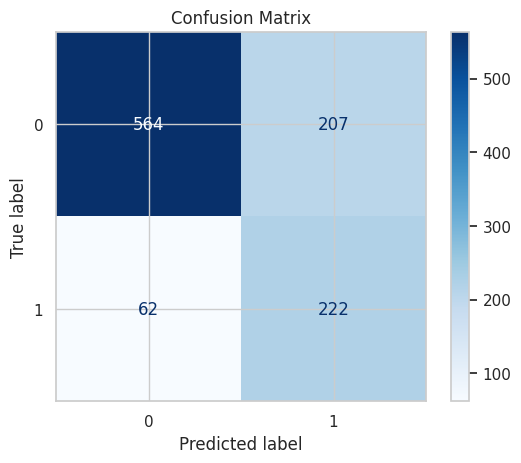

In [ ]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

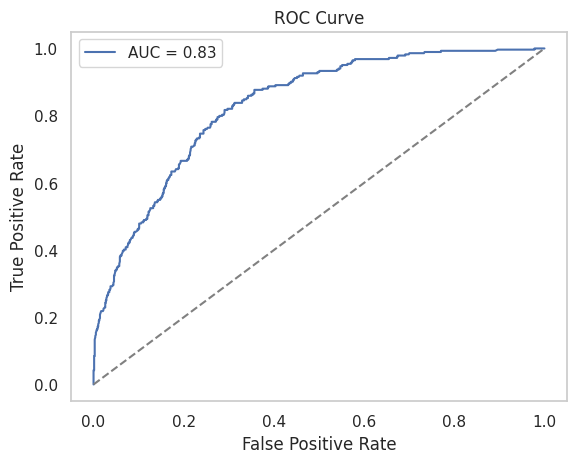

In [ ]:
# Calculating the ROC curve and AUC true score

from sklearn.metrics import roc_curve, roc_auc_score

y_proba = ada_model.predict_proba(X_test_prep[:, 1:])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

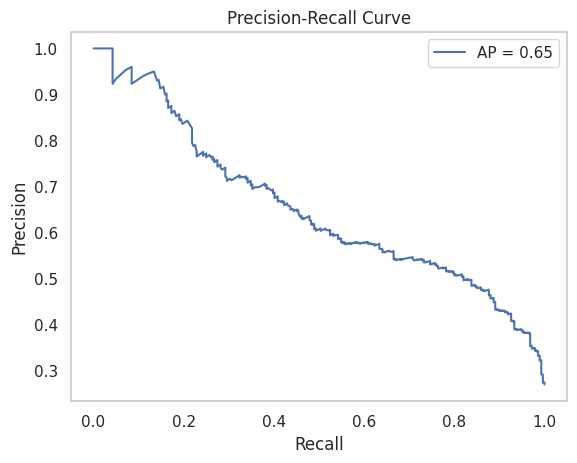

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.plot(recall, precision, label=f"AP = {ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.legend()
plt.show()

🔍 Best Threshold: 0.501
🏆 Best F1 Score at that Threshold: 0.627


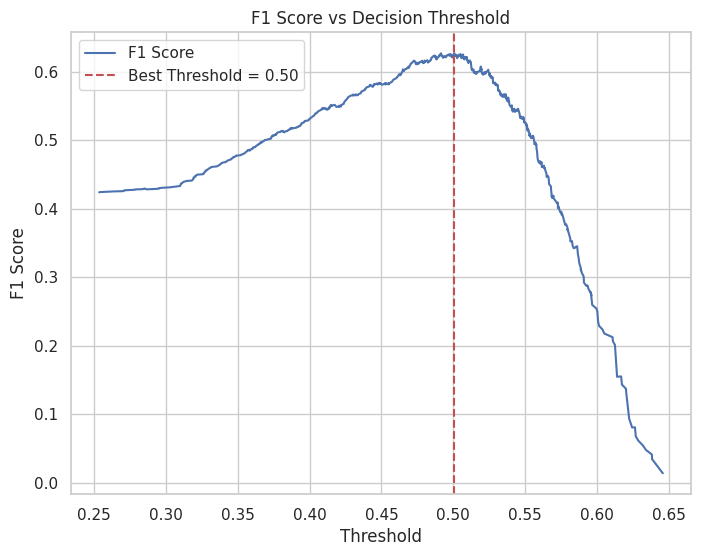

In [ ]:
from sklearn.metrics import precision_recall_curve

# Getting precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Computing F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Finding threshold that gives the best F1 score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"🔍 Best Threshold: {best_threshold:.3f}")
print(f"🏆 Best F1 Score at that Threshold: {best_f1:.3f}")

# Optional: Plot F1 vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Using the optimal threshold for classification
y_pred_optimal = (y_proba >= best_threshold).astype(int)

# Evaluating the new predictions
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal))

[[569 202]
 [ 62 222]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       771
           1       0.52      0.78      0.63       284

    accuracy                           0.75      1055
   macro avg       0.71      0.76      0.72      1055
weighted avg       0.80      0.75      0.76      1055



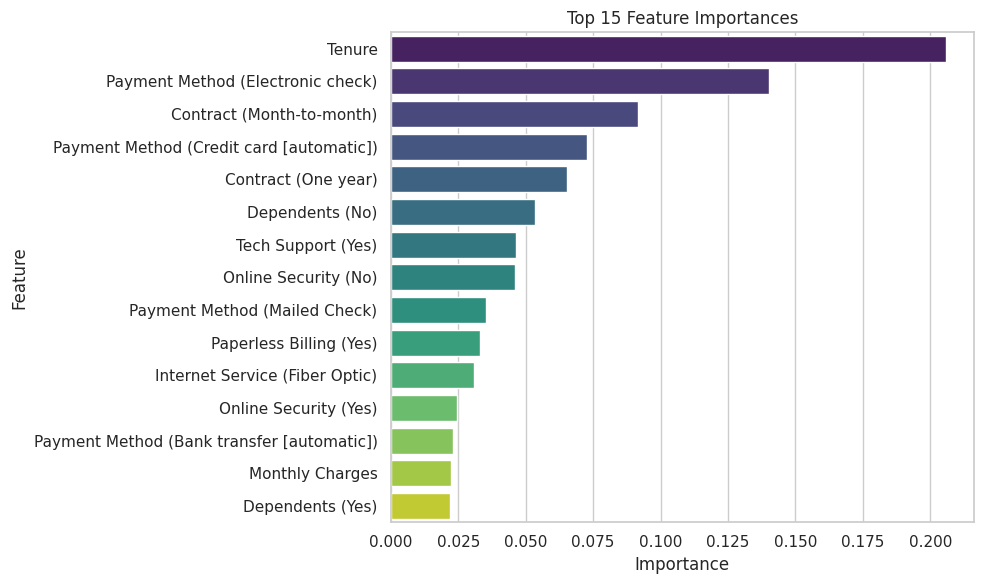

In [ ]:
# Plotting feature importances for the AdaBoostClassifier

importances = ada_model.feature_importances_
features = preprocessor.get_feature_names_out()[1:]
feature_names = ["Tenure", "Payment Method (Electronic check)", "Contract (Month-to-month)", "Payment Method (Credit card [automatic])",
            "Contract (One year)", "Dependents (No)", "Tech Support (Yes)", "Online Security (No)", "Payment Method (Mailed Check)",
            "Paperless Billing (Yes)", "Internet Service (Fiber Optic)", "Online Security (Yes)", "Payment Method (Bank transfer [automatic])",
            "Monthly Charges", "Dependents (Yes)"]
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
feat_imp_df_15 = feat_imp_df[:15].reset_index()

for idx, row in enumerate(feat_imp_df_15['Feature']):
  feat_imp_df_15['Feature'][idx] = feature_names[idx]

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df_15, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()